In [1]:
import pandas as pd
import os

## Merging all the data

In [2]:
file= [i for i in os.listdir('./Sales data')]
all_12data = pd.DataFrame()

for f in file:
    print(f)
    df = pd.read_csv('./Sales data/'+ f)
    all_12data = pd.concat([all_12data,df])
    
all_12data.to_csv('Final sales.csv',index=False)

Sales_October_2019.csv
Sales_November_2019.csv
Sales_April_2019.csv
Sales_December_2019.csv
Sales_May_2019.csv
Sales_January_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv


In [3]:
all_data = pd.read_csv('Final sales.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


### Cleaning up

In [4]:
#to view the Nan values 
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop the NaN values
all_data = all_data.dropna(how='any')

### Question 1: What was the best month for sale? How much money was earned?

#### Adding month column

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]

#Filtering data
all_data = all_data[all_data['Month'].str[0:2] != 'Or']

all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [8]:
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


#### Converting to correct data type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Adding sales column

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99


#### Analysing

In [11]:
result = all_data.groupby('Month').sum()
print(result)
months = range(1,13)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


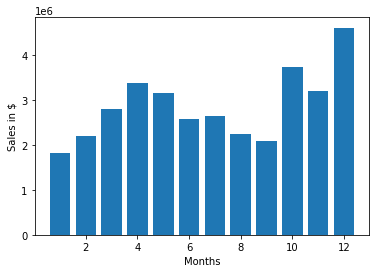

In [12]:
import matplotlib.pyplot as plt

plt.bar(months, result['Sales'])
plt.ylabel('Sales in $')
plt.xlabel('Months')
plt.show()

### Question 2: Which city had the highest number of sales?

#### Add city column

In [13]:
def state(add):
    return add.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + '('+ state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas(TX)
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles(CA)
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City(NY)
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City(NY)
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles(CA)


#### Analysing

In [14]:
res = all_data.groupby('City').sum()
print(res)

                    Quantity Ordered    Price Each   Month         Sales
City                                                                    
 Atlanta(GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin(TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston(MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas(TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles(CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City(NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland(ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland(OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco(CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle(WA)                   16553  2.733296e+06  104941  2.747755e+06


[' Atlanta(GA)', ' Austin(TX)', ' Boston(MA)', ' Dallas(TX)', ' Los Angeles(CA)', ' New York City(NY)', ' Portland(ME)', ' Portland(OR)', ' San Francisco(CA)', ' Seattle(WA)']


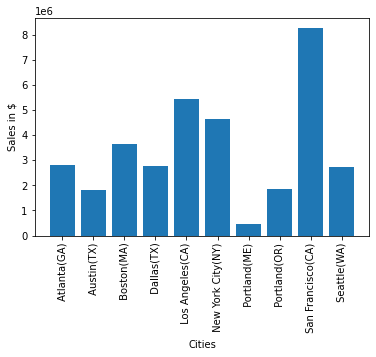

In [15]:
import matplotlib.pyplot as plt

cities = [c for c,df in all_data.groupby('City')]
print(cities)

plt.bar(cities, res['Sales'])
plt.ylabel('Sales in $')
plt.xlabel('Cities')
plt.xticks(cities, rotation= 'vertical')
plt.show()

### Question 3:What products are most often sold together?

#### Finding duplicate values

In [19]:
dup = all_data[all_data['Order ID'].duplicated(keep=False)]
dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles(CA)
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles(CA)
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco(CA)
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco(CA)
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles(CA)


In [20]:
r = dup.groupby('Order ID')['Product']
r.first()

Order ID
141275        USB-C Charging Cable
141290    Apple Airpods Headphones
141365             Vareebadd Phone
141384                Google Phone
141450                Google Phone
                    ...           
319536          Macbook Pro Laptop
319556                Google Phone
319584                      iPhone
319596                      iPhone
319631      34in Ultrawide Monitor
Name: Product, Length: 7136, dtype: object

In [21]:
dup['Group'] = r.transform(lambda x: ','.join(x))  
dup.head()

<ipython-input-21-1ce1e5360f12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Group'] = r.transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Group
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles(CA),"Google Phone,USB-C Charging Cable"
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles(CA),"Google Phone,USB-C Charging Cable"
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco(CA),"Google Phone,USB-C Charging Cable"
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco(CA),"Google Phone,USB-C Charging Cable"
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles(CA),"iPhone,Lightning Charging Cable"


#### Dropping duplicate values

In [22]:
dup = dup[['Order ID','Group']].drop_duplicates()
dup.head(10)

,Order ID,Group
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
176,259529,"iPhone,Apple Airpods Headphones,Wired Headphones"
186,259537,"AAA Batteries (4-pack),USB-C Charging Cable"
204,259554,"Apple Airpods Headphones,USB-C Charging Cable"
235,259584,"iPhone,Lightning Charging Cable"
259,259607,"iPhone,Lightning Charging Cable"


#### Combinations

In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup['Group']:
    row_list = row.split(',') 
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
